## **EVALUACIÓN MODELOS**
El dataset utilizado no contiene una gran cantidad de datos ya que se realizar exclusivamente de la zona de Churriana, Málaga y además nuestro modelo de scrapeo web termina bloqueando la extracción de datos y no nos permite obtener todos los datos de la zona disponibles.

Se aplican diferentes modelos para ver cual de ellos presenta el mejor comportamiento a la hora de predecir el precio:
* Regresión Lineal
* Regresión Bridge
* SVM-Support Vector Machine
* XgBoost Regresion
* Gradient Boosting Regressor
* Arbol de Regresión

### **Importamos las librerías necesarias:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

### **Importamos el modulo con las funciones para el calculo de modelos**

In [2]:
from ipynb.fs.defs.Funciones_modelos_ML import *

### **Leemos el fichero de datos completos**

In [3]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [4]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


#### **Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [5]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

#### **Recuperamos la variable objetivo y las features del store, así como los datasets de train y test**

In [6]:
#nos traemos los datos del store
%store -r datos_completos

#recuperamos los valores del objeto datos_completos y los guardamos en variable spor separado para usar en os modelos 

#variable objetivo y features
features = datos_completos.features
target = datos_completos.target

#train y test
features_train = datos_completos.features_train
target_train = datos_completos.target_train
features_test = datos_completos.features_test
target_test = datos_completos.target_test

#### **Regresión lineal**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
#Aplicamos la función de regresión lineal

r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_lineal(features_train, target_train, features_test, target_test)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994


### **Procesamiento de datos - normalización**

Procedemos a procesar los datos aplicando MinMaxScaler para normalizarlos aplicando una escala entre 0 y 1. Esto lo aplicaremos en todos los modelos y tendremos finalmente una tabla comparativa de la evaluación de modelos con datos sin procesar y datos escalados.

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
features_train_esc = scale.fit_transform(features_train)
features_test_esc = scale.fit_transform(features_test)

**Regresión Lineal con datos escalados**

In [10]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_lineal(features_train_esc, target_train, features_test_esc, target_test)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Datos escalados',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677


### **Regresión Ridge**

In [11]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_ridge(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Bridge','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797


**Regresión Bridge con datos escalados**

In [12]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_ridge(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Bridge','Datos escalados',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842


El modelo de regresión lineal presenta mejores resultados que el modelo bridge.
<br>
Veamos otros tipos de modelos a comparar.

### **SVM-Support Vector Machine**


In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = svm_support(features_train, target_train, features_test, target_test, kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = [f"SVM {kernel}","Sin procesar",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973


**SVM con datos escalados**

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = svm_support(features_train_esc, target_train, features_test_esc, target_test, kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = [f"SVM {kernel}","Datos escalados",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


Este modelo presenta los mejores resultados para el parámetro "linear", el resto no ajusta bien el modelo.

### **XGBoost**

In [15]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = xgboost_regresion(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['xgboost Regresion','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


**XGBoost con datos escalados**

In [16]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = xgboost_regresion(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['xgboost Regresion','Datos escalados',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


### **Gradient Boosting Regressor**

In [17]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = gb_regresion(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Gradient Boosting Regressor','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


**Gradient Boosting Regressor**

In [18]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = gb_regresion(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Gradient Boosting Regressor','Datos escalados',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


### **Random Forest Regressor**

In [19]:
r2_train,r2_test, MAE_train,MAE_test,target_train_pred,target_test_pred = arbol_regresion(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


**Random Forest Regressor**

In [20]:
r2_train,r2_test, MAE_train,MAE_test,target_train_pred,target_test_pred = arbol_regresion(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Datos sscalados',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
3,Regresión Bridge,Datos escalados,0.2052,0.1434,207906.719051,330167.148842
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
8,SVM linear,Datos escalados,-0.0894,-0.3480,215867.385009,386447.723129
9,SVM poly,Datos escalados,-0.0893,-0.3478,215824.622849,386399.463979


### **Valoración de resultados modelos**

Los modelos que han presentado mejor rendimientos han sido:<br>
* Árbol de Regresión sin procesar
* y SVM Linear sin procesar

Aun así los resultados optenidos no son los esperados, un porcentaje de precisión muy bajo y unos MAE muy elevados. En el siguiente notebook entrenaremos los mismos modelos con datos sin outliers para ver si los modelos presentan mejores resultados.

In [28]:
resultados.sort_values(by='R2 test',ascending=False)

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
16,Árbol de regresión,Sin procesar,0.5774,0.7596,95455.722670,172703.538059
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
1,Regresión Lineal,Datos escalados,0.8226,0.5991,111651.180321,241667.780677
17,Árbol de regresión,Datos sscalados,0.5774,0.5314,95455.722670,261597.541502
14,Gradient Boosting Regressor,Sin procesar,0.9958,0.5268,21729.779228,167876.985202
12,xgboost Regresion,Sin procesar,1.0000,0.4733,352.283242,175229.470806
15,Gradient Boosting Regressor,Datos escalados,0.9958,0.3944,21729.779228,239136.647191
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
13,xgboost Regresion,Datos escalados,1.0000,0.2626,352.283242,299370.102590
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994


Separamos la tabla en dato sin procesar y escalados para dibujarlos gráficamente por separado y hacer una comparación más visual del R2 test.

In [21]:
resultados_sin_procesar = resultados[resultados['Detalles'] == 'Sin procesar']

In [22]:
resultados_datos_escalados = resultados[resultados['Detalles'] == 'Datos escalados']

In [23]:
resultados_sin_procesar

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8226,0.2512,111651.180321,193646.602994
2,Regresión Bridge,Sin procesar,0.8065,0.3546,111347.069136,184121.811797
4,SVM linear,Sin procesar,0.7639,0.6973,107439.937805,138592.268673
5,SVM poly,Sin procesar,-0.0693,-0.2575,214909.500188,379279.223971
6,SVM rbf,Sin procesar,-0.0895,-0.3480,215883.421059,386456.616433
7,SVM sigmoid,Sin procesar,-0.0895,-0.3481,215891.619898,386467.649973
12,xgboost Regresion,Sin procesar,1.0000,0.4733,352.283242,175229.470806
14,Gradient Boosting Regressor,Sin procesar,0.9958,0.5268,21729.779228,167876.985202
16,Árbol de regresión,Sin procesar,0.5774,0.7596,95455.722670,172703.538059


In [24]:
resultados_sin_procesar['R2 test'] = resultados_sin_procesar['R2 test'].astype(float)
resultados_datos_escalados['R2 test'] = resultados_datos_escalados['R2 test'].astype(float)

/tmp/ipykernel_29771/1335637326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_sin_procesar['R2 test'] = resultados_sin_procesar['R2 test'].astype(float)
/tmp/ipykernel_29771/1335637326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_datos_escalados['R2 test'] = resultados_datos_escalados['R2 test'].astype(float)


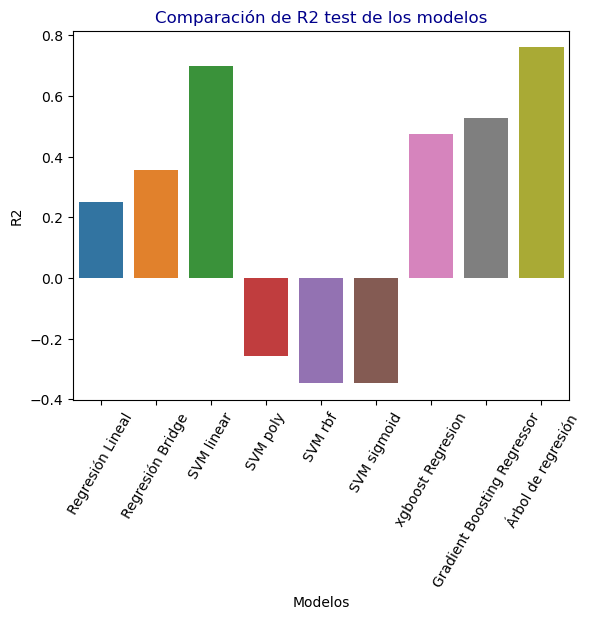

In [25]:
sns.barplot(x='Modelo', y='R2 test', data=resultados_sin_procesar)

# Añade título y etiquetas de eje
plt.title('Comparación de R2 test de los modelos', color='darkblue')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=60)

# Muestra el gráfico
plt.savefig("../graficas/comparacion_r2test_modelos")
plt.show()

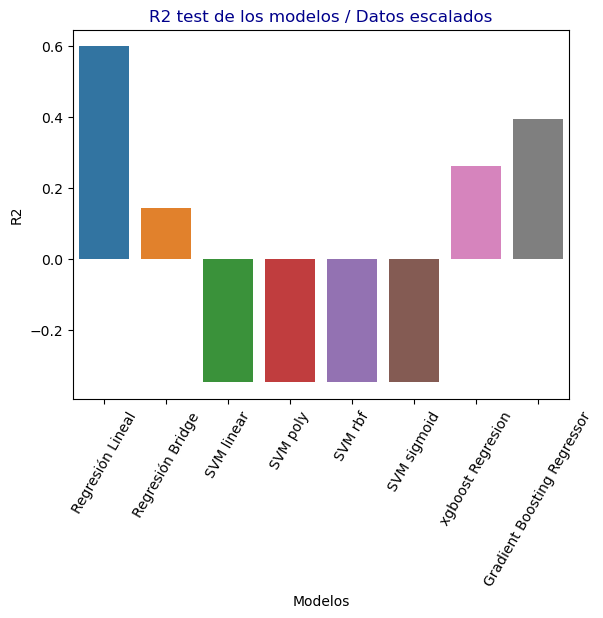

In [26]:
sns.barplot(x='Modelo', y='R2 test', data=resultados_datos_escalados)

# Añade título y etiquetas de eje
plt.title('R2 test de los modelos / Datos escalados', color='darkblue')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=60)

# Muestra el gráfico
plt.savefig("../graficas/comparacion_r2test_modelos_datos_escalados")
plt.show()

Guardamos la tabla de evaluaciones obtenida:

In [27]:
resultados.to_csv('../data/tabla_resultados_evaluaciones_modelos.csv', index=False)